CODE BLOCK: 1

In [1]:
# del model
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from model import Net1
from utils import train, test
import torch.nn.functional as F

CODE BLOCK: 2

In [2]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? False


In [3]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("mps")
model = Net1()
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
            Conv2d-4           [-1, 16, 24, 24]           2,320
              ReLU-5           [-1, 16, 24, 24]               0
       BatchNorm2d-6           [-1, 16, 24, 24]              32
            Conv2d-7           [-1, 32, 22, 22]           4,640
              ReLU-8           [-1, 32, 22, 22]               0
       BatchNorm2d-9           [-1, 32, 22, 22]              64
           Conv2d-10           [-1, 32, 11, 11]           1,056
           Conv2d-11             [-1, 16, 9, 9]           4,624
             ReLU-12             [-1, 16, 9, 9]               0
      BatchNorm2d-13             [-1, 16, 9, 9]              32
           Conv2d-14             [-1, 1

CODE BLOCK: 3

In [4]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

CODE BLOCK: 5

In [6]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

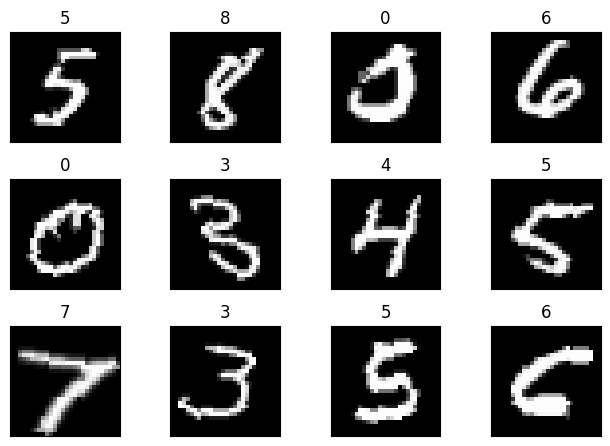

In [7]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 10

In [9]:
model = Net1().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc, train_losses = train(model, device, train_loader, optimizer, criterion)
  test_acc, test_losses = test(model, device, test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 1


Train: Loss=0.0643 Batch_id=117 Accuracy=85.99: 100%|██████████| 118/118 [00:07<00:00, 15.88it/s]


Test set: Average loss: 0.0700, Accuracy: 9821/10000 (98.21%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 2


Train: Loss=0.0803 Batch_id=117 Accuracy=97.69: 100%|██████████| 118/118 [00:07<00:00, 15.89it/s]


Test set: Average loss: 0.0557, Accuracy: 9841/10000 (98.41%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 3


Train: Loss=0.0967 Batch_id=117 Accuracy=98.23: 100%|██████████| 118/118 [00:07<00:00, 15.91it/s]


Test set: Average loss: 0.0380, Accuracy: 9893/10000 (98.93%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 4


Train: Loss=0.0738 Batch_id=117 Accuracy=98.46: 100%|██████████| 118/118 [00:07<00:00, 15.62it/s]


Test set: Average loss: 0.0269, Accuracy: 9926/10000 (99.26%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 5


Train: Loss=0.0719 Batch_id=117 Accuracy=98.58: 100%|██████████| 118/118 [00:07<00:00, 15.73it/s]


Test set: Average loss: 0.0267, Accuracy: 9924/10000 (99.24%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 6


Train: Loss=0.0104 Batch_id=117 Accuracy=98.91: 100%|██████████| 118/118 [00:07<00:00, 15.59it/s]


Test set: Average loss: 0.0197, Accuracy: 9941/10000 (99.41%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 7


Train: Loss=0.0633 Batch_id=117 Accuracy=99.05: 100%|██████████| 118/118 [00:07<00:00, 14.79it/s]


Test set: Average loss: 0.0194, Accuracy: 9947/10000 (99.47%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 8


Train: Loss=0.0100 Batch_id=117 Accuracy=99.06: 100%|██████████| 118/118 [00:07<00:00, 15.11it/s]


Test set: Average loss: 0.0191, Accuracy: 9942/10000 (99.42%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 9


Train: Loss=0.0267 Batch_id=117 Accuracy=99.10: 100%|██████████| 118/118 [00:07<00:00, 15.35it/s]


Test set: Average loss: 0.0186, Accuracy: 9953/10000 (99.53%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 10


Train: Loss=0.0309 Batch_id=117 Accuracy=99.08: 100%|██████████| 118/118 [00:07<00:00, 15.05it/s]


Test set: Average loss: 0.0180, Accuracy: 9951/10000 (99.51%)

Adjusting learning rate of group 0 to 5.0000e-04.
Epoch 11


Train: Loss=0.0280 Batch_id=117 Accuracy=99.15: 100%|██████████| 118/118 [00:07<00:00, 15.35it/s]


Test set: Average loss: 0.0182, Accuracy: 9951/10000 (99.51%)

Adjusting learning rate of group 0 to 5.0000e-04.
Epoch 12


Train: Loss=0.0138 Batch_id=117 Accuracy=99.15: 100%|██████████| 118/118 [00:07<00:00, 15.37it/s]


Test set: Average loss: 0.0181, Accuracy: 9953/10000 (99.53%)

Adjusting learning rate of group 0 to 5.0000e-04.
Epoch 13


Train: Loss=0.0096 Batch_id=117 Accuracy=99.17: 100%|██████████| 118/118 [00:07<00:00, 15.16it/s]


Test set: Average loss: 0.0181, Accuracy: 9949/10000 (99.49%)

Adjusting learning rate of group 0 to 5.0000e-04.
Epoch 14


Train: Loss=0.0336 Batch_id=117 Accuracy=99.19: 100%|██████████| 118/118 [00:07<00:00, 14.89it/s]


Test set: Average loss: 0.0180, Accuracy: 9948/10000 (99.48%)

Adjusting learning rate of group 0 to 5.0000e-04.
Epoch 15


Train: Loss=0.0567 Batch_id=117 Accuracy=99.16: 100%|██████████| 118/118 [00:07<00:00, 14.99it/s]


Test set: Average loss: 0.0181, Accuracy: 9950/10000 (99.50%)

Adjusting learning rate of group 0 to 5.0000e-05.


**Target**
1. Set up a model structure, borrowed from previous exercise
2. Basic code from the previous exercise
3. CenterCrop as transform

**Results**
1. Train Acc: 99.31
2. Test Acc: 99.44
3. Parameters: 20k

**Analysis**
1. The model does achieve the target of 99.4% accuracy and is consistent too.
2. The model is under-fitting without any drop-out, our transform seems to be doing a good job making the training hard.
3. Let's see what the model can do with the least parameters setup.

[]

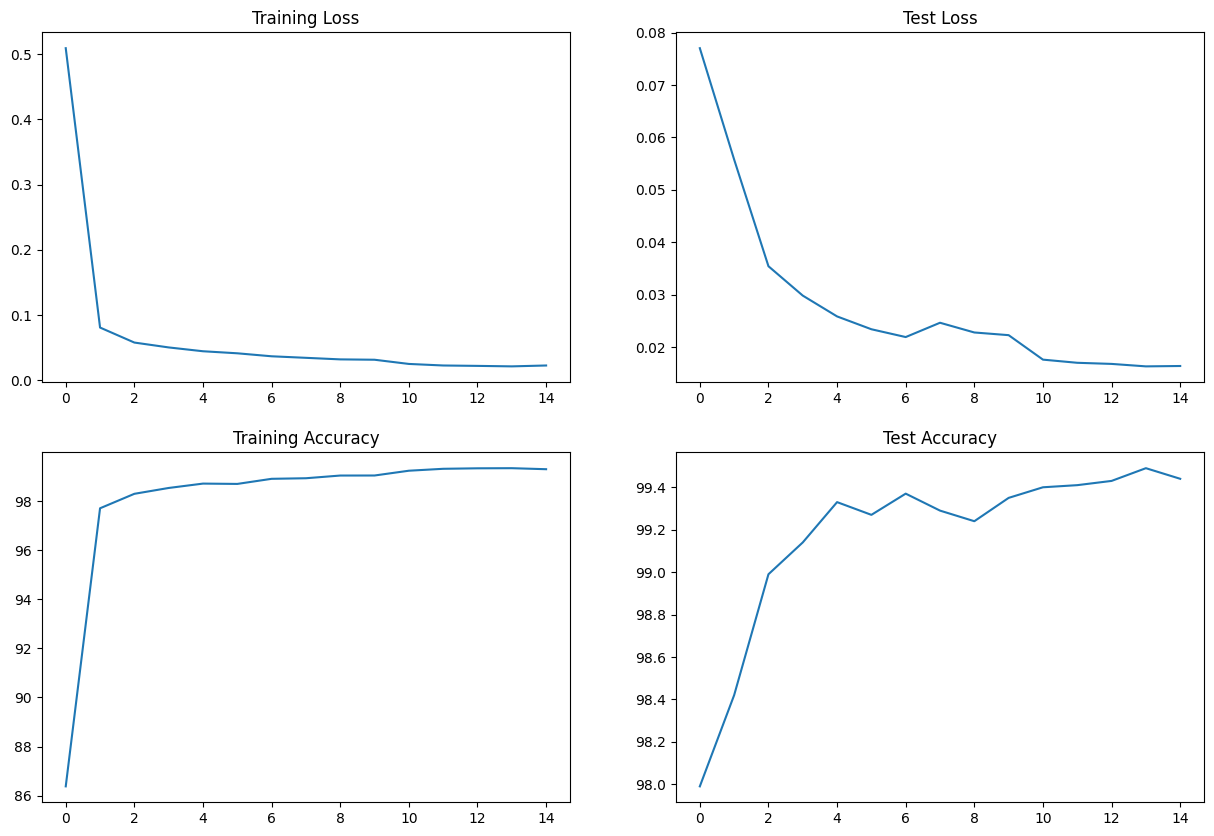

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")
plt.plot()